# Regression examples

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
husband_wife = pd.read_csv('Regression_1_data/Husband_wife_heights.txt', sep='\t')
husband_wife[:10]

,Husband,Wife
0,186,175
1,180,168
2,160,154
3,186,166
4,163,162
5,172,152
6,192,179
7,170,163
8,174,172
9,191,170


In [3]:
len(husband_wife)

96

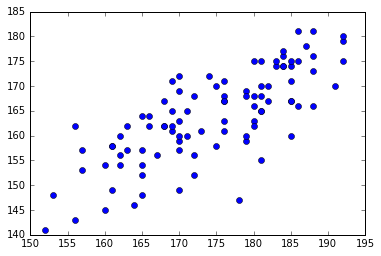

In [4]:
plot(husband_wife['Husband'], husband_wife['Wife'], marker='o', linestyle='')

In [5]:
# Shorter command to do the same thing
#scatter(husband_wife['Husband'], husband_wife['Wife'])

In [6]:
savefig('slide_figs/husband_wife_scatter.png')

IOError: [Errno 2] No such file or directory: 'slide_figs/husband_wife_scatter.png'

In [7]:
husband_wife.describe()

,Husband,Wife
count,96.000000,96.000000
mean,174.322917,163.895833
std,9.960443,9.128877
min,152.000000,141.000000
25%,166.750000,158.000000
50%,175.500000,164.500000
75%,182.250000,170.250000
max,192.000000,181.000000


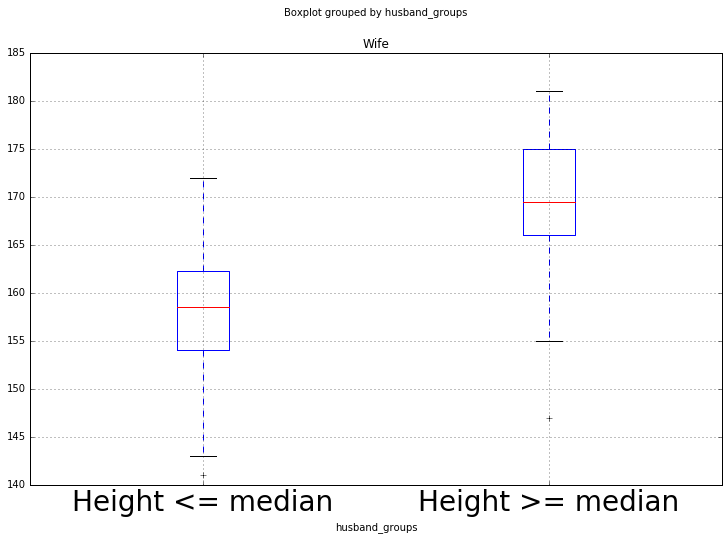

In [8]:
husband_wife['husband_groups'] = pd.qcut(husband_wife['Husband'], 2, labels=['Height <= median', 'Height >= median'])
husband_wife.boxplot(column='Wife', by='husband_groups', figsize=(12,8), fontsize=28)
savefig('slide_figs/husband_wife_boxplot2.png')

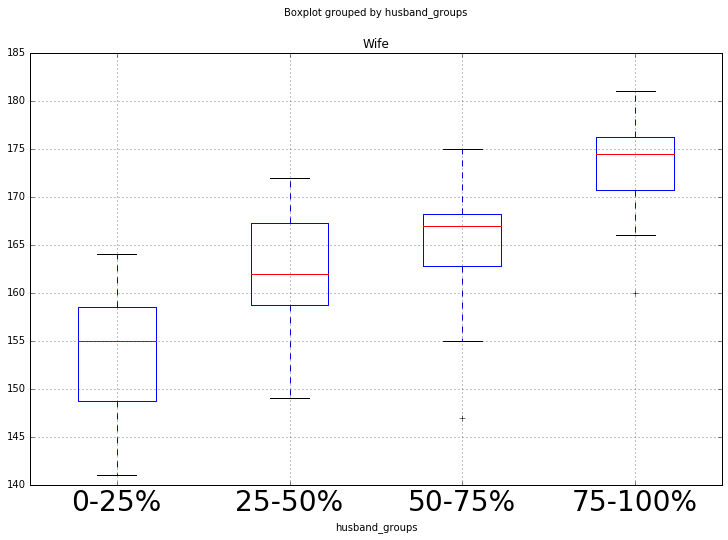

In [9]:
husband_wife['husband_groups'] = pd.qcut(husband_wife['Husband'], 4, labels=['0-25%', '25-50%', '50-75%', '75-100%'])
husband_wife.boxplot(column='Wife', by='husband_groups', figsize=(12,8), fontsize=28)
savefig('slide_figs/husband_wife_boxplot4.png')

### Running linear regression

In [10]:
# Do the regression by pd.ols()
# ols stands for "ordinary least squares", which is another
#       name for "simple linear regression"

result = pd.ols(x=husband_wife['Husband'], y=husband_wife['Wife'])
result

C:\Users\deepay\Miniconda\lib\site-packages\IPython\core\interactiveshell.py:3066: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         96
Number of Degrees of Freedom:   2

R-squared:         0.5828
Adj R-squared:     0.5783

Rmse:              5.9280

F-stat (1, 94):   131.2893, p-value:     0.0000

Degrees of Freedom: model 1, resid 94

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.6997     0.0611      11.46     0.0000     0.5800     0.8193
     intercept    41.9302    10.6616       3.93     0.0002    21.0334    62.8269
---------------------------------End of Summary---------------------------------

We can get various quantities of interest out of this result.

In [11]:
print 'Intercept =', result.beta['intercept']
print 'Slope =', result.beta['x']

Intercept = 41.9301535479
Slope = 0.699653735249


In [12]:
# R-squared
result.r2

0.582758791103415

In [13]:
# p-value 
result.p_value

x            1.536359e-19
intercept    1.605824e-04
dtype: float64

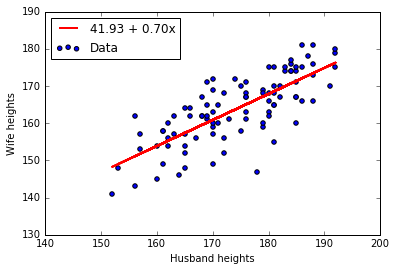

In [14]:
# Get the expected wife heights (i.e., expected y values)
y_expected = result.beta['intercept'] + husband_wife['Husband'] * result.beta['x']

# Nicely get the regression coefficient and slope in one string
regression_formula = '{0:.2f} + {1:.2f}x'.format(result.beta['intercept'], result.beta['x'])

# Now plot both the true wife heights and the expected heights
scatter(husband_wife['Husband'], husband_wife['Wife'], label='Data')
plot(husband_wife['Husband'], y_expected, linewidth=2, color='red', label=regression_formula)
xlabel('Husband heights')
ylabel('Wife heights')
legend(loc='upper left')

In [15]:
figsize(8,6)
savefig('slide_figs/husband_wife_linear.png')

Let us do this for several stock indices:

Index | Ticker
----- | ------
S&P 500 | SPY
NASDAQ | QQQ
Emerging Markets | EEM

In [16]:
from datetime import datetime
import pandas_datareader.data as web

start_date = datetime(2011, 1, 1) # January 1, 2011
end_date = datetime(2014, 1, 1)   # January 1, 2014

# Create a dictionary with 
#   key = ticker symbol
#   value = the Series of their daily closes
ticker_dict = {}
for idx, ticker in enumerate(['SPY', 'QQQ', 'EEM']):
    df_ticker = web.DataReader(ticker, 'yahoo', start_date, end_date)
    ticker_dict[ticker] = df_ticker['Close']

# Create a DataFrame from all these
df = DataFrame(ticker_dict)
df[:10]
    

,EEM,QQQ,SPY
Date,,,
2011-01-03,48.099998,55.310001,127.050003
2011-01-04,48.320000,55.270000,126.980003
2011-01-05,48.200001,55.740002,127.639999
2011-01-06,47.689999,55.919998,127.389999
2011-01-07,47.250000,55.869999,127.139999
2011-01-10,46.759998,56.080002,126.980003
2011-01-11,47.259998,56.160000,127.430000
2011-01-12,48.209999,56.560001,128.580002
2011-01-13,47.790001,56.580002,128.369995


In [17]:
result = pd.ols(x=df['SPY'], y=df['QQQ'])
print 'Beta'
print result.beta
print
print 'R-squared'
print result.r2
print
print 'p-value'
print result.p_value

Beta
x            0.476805
intercept   -2.977356
dtype: float64

R-squared
0.935769953494

p-value
x            0.000000
intercept    0.000007
dtype: float64


**Observations:**

* Positive association of 0.47 with very small p-value (0.000)
    * so we are pretty sure the association is positive
* Very high R-squared (0.93)
    * SPY price on any day gives a good prediction for QQQ price

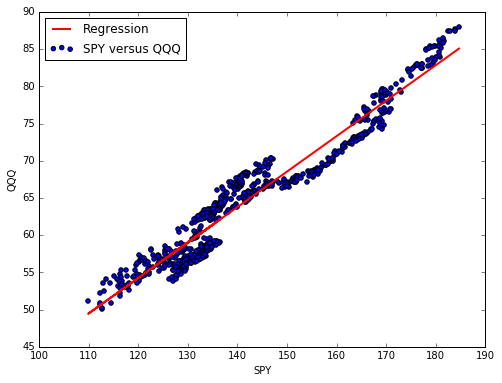

In [18]:
x = df['SPY']
y_expected = result.beta['intercept'] + result.beta['x'] * df['SPY']

scatter(x=df['SPY'], y=df['QQQ'], label='SPY versus QQQ')
plot(df['SPY'], y_expected, color='red', linewidth=2, label='Regression')
xlabel('SPY')
ylabel('QQQ')
legend(loc='best')

In [19]:
result = pd.ols(x=df['SPY'], y=df['EEM'])

print 'Beta'
print result.beta
print
print 'R-squared'
print result.r2
print
print 'p-value'
print result.p_value

Beta
x            -0.015527
intercept    44.431280
dtype: float64

R-squared
0.00714319598142

p-value
x             2.028291e-02
intercept    1.542950e-221
dtype: float64


**Observations:**

* _Negative_ slope of -0.015
    * but p-value is 0.02, which is OK but not great (recall: smaller p-values are better)
    * we cannot be very sure that any association exists at all
* R-squared is abysmally small at 0.007
    * Regression has very low predictive power
    * Knowing SPY today doesn't tell me much about EEM today.

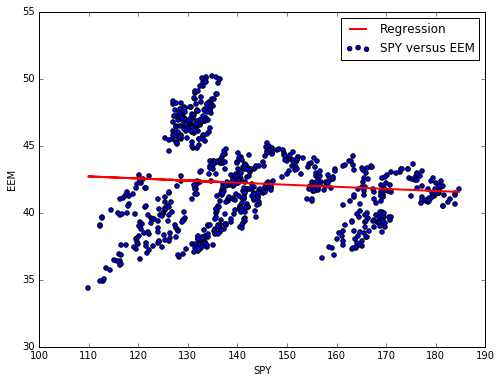

In [20]:
x = df['SPY']
y_expected = result.beta['intercept'] + result.beta['x'] * df['SPY']

scatter(x=df['SPY'], y=df['EEM'], label='SPY versus EEM')
plot(df['SPY'], y_expected, color='red', linewidth=2, label='Regression')
xlabel('SPY')
ylabel('EEM')
legend(loc='best')

In [8]:
gmc_prices = pd.read_csv('Regression_1_data/GMC pickup prices.csv')
gmc_prices[:10]

,List price,Best price
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1
5,16.9,14.8
6,16.5,14.4
7,15.4,13.4
8,17.0,14.9
9,17.9,15.6


The data contains the list prices and best prices of GMC pickups (in thousands of dollars).

In [22]:
result = pd.ols(x=gmc_prices['List price'], y=gmc_prices['Best price'])

print 'Beta'
print result.beta
print
print 'R-squared'
print result.r2
print
print 'p-value'
print result.p_value

Beta
x            0.851144
intercept    0.434584
dtype: float64

R-squared
0.99708312474

p-value
x            4.148382e-28
intercept    2.291198e-02
dtype: float64


**Observations:**

* As you might expect, best price is pretty well predicted by list price
    * R-squared is 0.997
* The slope is 0.85
    * If list price increases by 1000 dollars, best price increases by 850 dollars

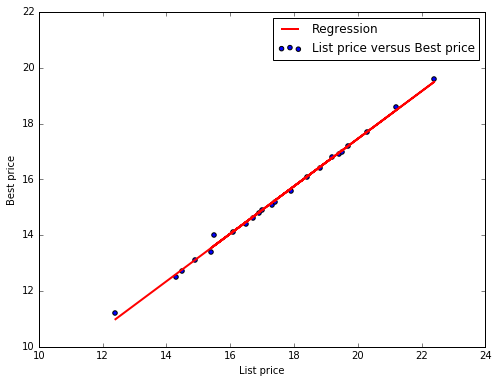

In [23]:
x = gmc_prices['List price']
y_expected = result.beta['intercept'] + result.beta['x'] * x

scatter(x=x, y=gmc_prices['Best price'], label='List price versus Best price')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('List price')
ylabel('Best price')
legend(loc='best')

In [24]:
pizza = pd.read_csv('Regression_1_data/Pizza franchise.csv')
pizza[:10]

,Annual franchise fee,Start up cost
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300
5,1150,1300
6,1250,1400
7,1150,1400
8,1100,1250
9,1350,1830


This data is about pizza franchises. The first column is the franchise fee that needs to be paid (in thousands of dollars), and the second is the start-up cost for a franchise (again, in thousands of dollars).

In [25]:
result = pd.ols(x=pizza['Annual franchise fee'], y=pizza['Start up cost'])

print 'Beta'
print result.beta
print
print 'R-squared'
print result.r2
print
print 'p-value'
print result.p_value

Beta
x              0.373158
intercept    867.604222
dtype: float64

R-squared
0.227535918156

p-value
x            3.266266e-03
intercept    2.441883e-07
dtype: float64


**Observations:**

* Positive association since slope is 0.37 with p-value 0.003
* But R-squared is pretty low (0.22)
    * So we can't predict start-up cost from the franchise fee very well

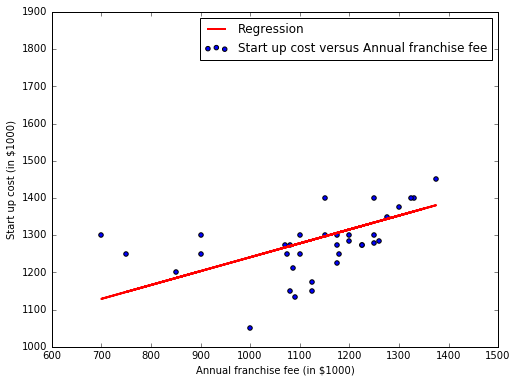

In [26]:
x = pizza['Annual franchise fee']
y_expected = result.beta['intercept'] + result.beta['x'] * x

scatter(x=x, y=pizza['Start up cost'], label='Start up cost versus Annual franchise fee')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('Annual franchise fee (in $1000)')
ylabel('Start up cost (in $1000)')
legend(loc='best')

Perhaps higher fees for premium locations?

Which guys are the outliers?

* How did one avoid high start up cost in spite of paying a high annual fee?
* Why did one have high start up costs in spite of having low fees?

Some datasets:

* http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html
* http://www.stat.ufl.edu/~winner/Regression_Examples.html
* http://statweb.stanford.edu/~nzhang/191_web/